# [WIP] Cliopatria viewer 2: Cartopy

1. Unzip the Cliopatria GeoJSON file by running the first cell of this notebook.
2. Run the `convert_data.py` script, which will create a new version of the GeoJSON with unique colors for each polity.
   - This will take a few moments to run and create a new file called `cliopatria_seshat_processed.geojson`
   - This version of the GeoJSON is ready to be used by the Seshat Global History Databank website, but we'll also explore it here in this notebook
3. Run the subsequent cells of this notebook
4. Play around with both the GeoDataFrame (gdf) and the rendered maps


In [1]:
# Unzip the Cliopatria GeoJson file
# !unzip -o "../cliopatria.geojson.zip" -d "../"

In [2]:
# Generate the Seshat-processed GeoJSON
# !python convert_data.py ../cliopatria.geojson

In [3]:
cliopatria_geojson_path = "../cliopatria_seshat_processed.geojson"

In [4]:
# Import necessary libraries
from map_functions import display_map
import geopandas as gpd
import cartopy.crs as ccrs

In [5]:
# Load the processed Cliopatria data to a GeoDataFrame with geopandas
gdf = gpd.read_file(cliopatria_geojson_path)
gdf.sample(5)  # Display a sample of the data

,Name,FromYear,ToYear,Area,Type,Wikipedia,SeshatID,MemberOf,Components,DisplayName,Color,PolityStartYear,PolityEndYear,geometry
14065,United States of America,1942,1943,1.177019e+07,POLITY,United States,,(United States of America),,United States of America,#b71bfd,1776,2024,"MULTIPOLYGON (((-156.42531 20.47196, -156.4990..."
13683,(Kingdom of Italy),1922,1928,2.996022e+05,POLITY,Kingdom of Italy,it_italian_k,,Kingdom of Italy,Kingdom of Italy,#77df02,587,1946,"MULTIPOLYGON (((28.13933 36.0308, 27.74256 35...."
6453,County of Nevers,1285,1325,1.335514e+04,POLITY,County of Nevers,fr_capetian_k_2,(Kingdom of France),,County of Nevers,#9b1221,1010,1520,"MULTIPOLYGON (((3.64668 46.54585, 2.98451 46.6..."
6904,Malaya,1344,1351,1.432733e+05,POLITY,Malaya,,,,Malaya,#8780de,1294,1351,"MULTIPOLYGON (((104.20345 0.92854, 104.13067 0..."
4471,Fatimid Caliphate,970,979,1.946214e+06,POLITY,Fatimid Caliphate,tn_fatimid_cal,,,Fatimid Caliphate,#c02c26,911,1176,"MULTIPOLYGON (((10.30544 37.06151, 10.22835 36..."


# Play with the data on the map

**Notes**
- Use minus numbers for BCE.
- This currently has some bugs, e.g. the plot duplicates
- Shapes cannot be clicked on - check out the Folium plot in the `cliopatria.ipynb` notebook
- Change the projection to any of these: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

IntText(value=1200, description='Year:')

IntSlider(value=1200, description='Year:', max=2024, min=-3400)

RadioButtons(description='Display:', options=('Polities', 'Components'), value='Polities')

Output()

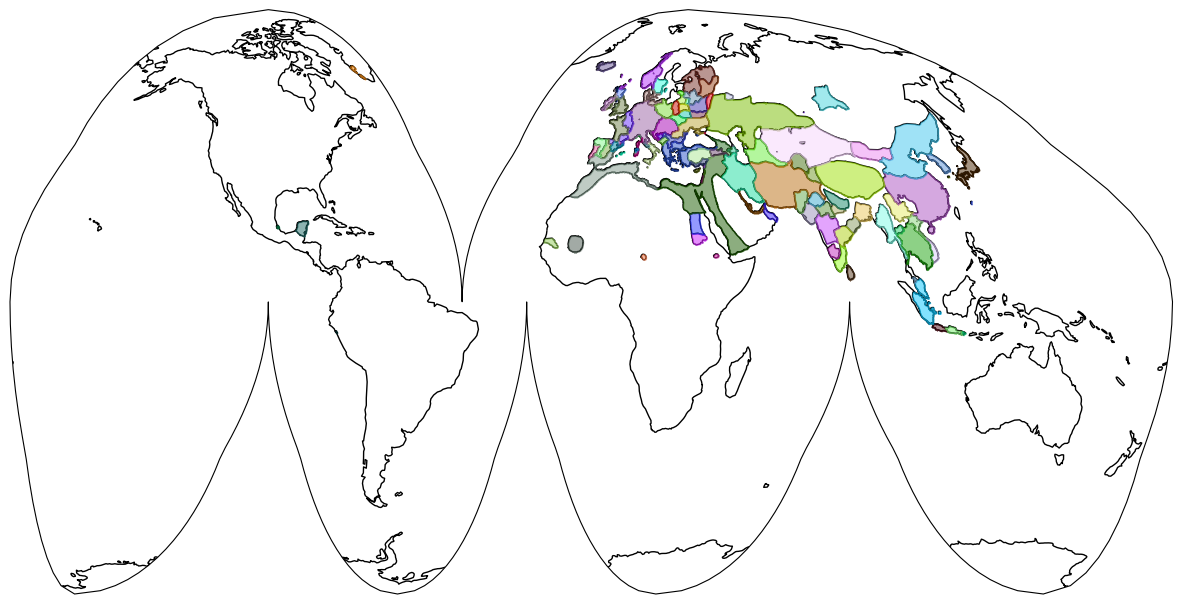

In [7]:
display_map(gdf, 1200, map_function='cartopy', projection=ccrs.InterruptedGoodeHomolosine())